In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
from experiments import BasicSetup
from experiments import utilities as utils
from bayesinverse import Regression

In [3]:
config_path = config_path = Path(
    "/home/rmaiwald/code/Experiments/experiments/basic_setup/config.yaml"
)

basic_setup = BasicSetup(config_path)
basic_setup.run()


<xarray.DataArray (source_group: 21, time_state: 10)>
array([[ 1.00000000e+00, -2.92740551e-02,  1.00000000e+00,
         1.00000000e+00,  2.66872851e-02,  2.07989388e-02,
         1.00610393e+00,  1.00000000e+00,  1.00000000e+00,
         5.94044262e-01],
       [ 7.95584981e-01,  9.13912895e-01,  9.56860241e-01,
         1.07387792e+00,  5.43209320e-01,  6.54048220e-01,
         7.83999763e-01,  1.00000000e+00,  9.59371184e-01,
         6.94100849e-01],
       [ 3.81444294e-01,  9.56795223e-01, -1.43772401e-01,
         7.60220740e-01, -1.33780024e-01,  4.08070936e-01,
         1.10628672e+00,  5.05048542e-01,  7.31126125e-01,
         4.99812538e-01],
       [-3.07874994e+00, -3.00019174e+00, -2.55307955e+00,
        -3.10179299e+00, -3.07370903e+00, -3.06736499e+00,
        -3.07874994e+00, -2.95001271e+00, -2.99012515e+00,
        -3.07874994e+00],
       [-1.67763666e-01, -3.31424232e-01, -1.77567534e-01,
        -2.49243100e-01, -1.66809354e-01, -2.73825501e-01,
         2.97908

In [ ]:
K = basic_setup.transport.get_K(1004, basic_setup.sensors, basic_setup.emissions.p)

In [ ]:
K.sum(dim="sensor")

<xarray.DataArray (source_group: 21)>
array([0.        , 0.22333702, 0.15137414, 0.        , 0.19263437,
       0.23996269, 0.27960293, 0.63342985, 0.91837233, 0.00321613,
       0.01881514, 0.02619016, 0.        , 0.0199027 , 0.04156501,
       0.07676738, 0.1953184 , 0.07329705, 0.00261231, 0.01322039,
       0.34125793])
Coordinates:
  * source_group  (source_group) int64 1 2 21 22 23 24 25 ... 34 35 36 37 38 39

In [ ]:
basic_setup.emissions.mask


<xarray.DataArray (source_group: 59)>
array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])
Coordinates:
  * source_group  (source_group) int64 1 2 3 4 5 6 7 8 ... 53 54 55 56 57 58 59

In [ ]:
basic_setup.K

<xarray.DataArray (sensor: 20, time_measurement: 10, source_group: 21,
                   time_state: 10)>
array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
...
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]]]])
Coordinates:
  * time_measurement  (time_measurement) int64 852 301 148 336 ... 127 371 625
Dimensions without coordinates: sensor, source_group, time_state

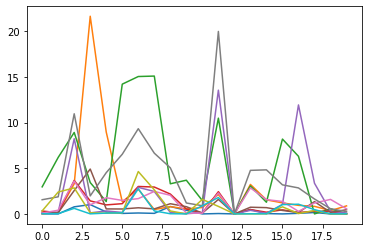

In [ ]:
plt.plot((basic_setup.K @ basic_setup.emissions.truth))

In [ ]:
x_est, res, rank, s = basic_setup.reg.fit()

In [ ]:
posterior = basic_setup.emissions.to_xr(x_est)


In [ ]:
utils.stack_xr(posterior)

<xarray.DataArray (state: 210)>
array([-0.00000000e+00,  1.02927406e+00, -1.15463195e-14, -4.85722573e-15,
        9.73312715e-01,  9.79201061e-01, -6.10392841e-03, -1.26565425e-14,
        1.50990331e-14,  4.05955738e-01,  2.04415019e-01,  8.60871054e-02,
        4.31397593e-02, -7.38779219e-02,  4.56790680e-01,  3.45951780e-01,
        2.16000237e-01,  5.32907052e-14,  4.06288158e-02,  3.05899151e-01,
        6.18555706e-01,  4.32047769e-02,  1.14377240e+00,  2.39779260e-01,
        1.13378002e+00,  5.91929064e-01, -1.06286722e-01,  4.94951458e-01,
        2.68873875e-01,  5.00187462e-01,  4.07874994e+00,  4.00019174e+00,
        3.55307955e+00,  4.10179299e+00,  4.07370903e+00,  4.06736499e+00,
        4.07874994e+00,  3.95001271e+00,  3.99012515e+00,  4.07874994e+00,
        1.16776367e+00,  1.33142423e+00,  1.17756753e+00,  1.24924310e+00,
        1.16680935e+00,  1.27382550e+00,  7.02091152e-01,  1.73658973e+00,
        1.14353527e+00,  1.21481033e+00,  7.88633571e-01,  7.46989469e-01,
        5.65003954e-01,  2.99333200e-01,  1.50419919e+00,  1.29083374e+00,
        1.59638327e-01,  1.14831786e+00,  8.65076038e-01,  1.21223951e+00,
        6.62650394e-01,  7.07049561e-01,  1.20972378e+00,  1.79151967e-01,
        6.31804291e-01,  5.37801254e-01,  1.13864094e+00,  1.27809639e+00,
        4.36329910e-01,  6.07063932e-01,  6.39129595e-01,  9.76630923e-01,
        8.34859631e-01, -8.74609416e-02,  1.22223549e+00,  4.14474714e-01,
        1.21698237e+00,  1.32183242e+00,  4.04244970e-01,  6.20632373e-01,
...
        8.77350450e-01,  1.02220724e+00,  8.00071911e-01,  1.07392609e+00,
        3.69098785e-01,  7.35063223e-01,  6.44670865e-01,  1.01256863e+00,
        1.26642504e+00,  1.34199330e+00,  9.17537827e-01,  9.24551747e-01,
        1.52084123e+00,  1.20693095e+00,  1.20746514e+00,  9.84190591e-01,
        1.24390082e+00,  1.26757663e+00,  8.49313142e-01,  2.80877030e-01,
        1.00838919e+00,  1.29618118e+00,  8.09927426e-01,  1.19220960e+00,
        2.06035630e+00,  1.05020366e+00,  7.79691105e-01,  6.79043921e-01,
        1.56296867e+00,  1.27721838e+00,  9.01373768e-01,  1.03940813e+00,
        1.18549490e+00,  1.17968759e+00,  1.22023936e+00,  1.24416405e+00,
        1.93506569e+00,  1.35216474e+00,  4.34406007e+00,  4.35795827e+00,
        4.12085251e+00,  4.36674799e+00,  4.26820860e+00,  4.38917604e+00,
        4.19303671e+00,  4.36711821e+00,  4.28244506e+00,  4.32787468e+00,
        1.32042674e+00,  1.00138096e+00,  1.43976624e+00,  1.38124135e+00,
        1.37140202e+00,  1.36490033e+00,  1.16106133e+00,  1.28197382e+00,
        1.22625461e+00,  1.30518755e+00,  1.14515579e+01,  1.14726279e+01,
        1.12723680e+01,  1.14211301e+01,  1.13215561e+01,  1.14564725e+01,
        1.14512537e+01,  1.10879689e+01,  1.13729596e+01,  1.14763769e+01,
        1.21150470e+00,  1.01361184e+00,  1.00087993e+00,  1.06783058e+00,
        8.69298274e-01,  1.21050849e+00,  1.49683576e+00,  8.10064076e-01,
        2.42015810e-01,  2.03205868e-01])
Coordinates:
  * state         (state) MultiIndex
  - source_group  (state) int64 1 1 1 1 1 1 1 1 1 ... 39 39 39 39 39 39 39 39 39
  - time_state    (state) int64 0 1 2 3 4 5 6 7 8 9 0 ... 9 0 1 2 3 4 5 6 7 8 9

In [ ]:
posterior = posterior * basic_setup.emissions.get_absolute()[basic_setup.emissions.mask]

In [ ]:
a = np.array([["a", "b"],["c", "d"]])
b = np.array([[1, 2], [3, 4]])
np.tensordot(b, b, axes=0).reshape(4, 4), np.tensordot(b, b, axes=0).shape

(array([[ 1,  2,  3,  4],
        [ 2,  4,  6,  8],
        [ 3,  6,  9, 12],
        [ 4,  8, 12, 16]]),
 (2, 2, 2, 2))

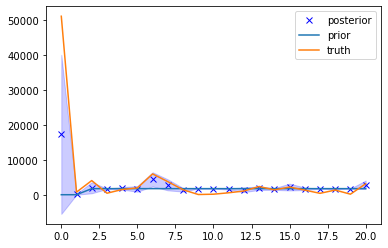

In [ ]:
mean = posterior.mean("time_state")
std = posterior.std("time_state")
line = plt.plot(mean, "bx", label="posterior")[0]
plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2, color=line._color)

plt.plot(basic_setup.emissions.prior_absolute.mean("time_state"), label="prior")
plt.plot(basic_setup.emissions.truth_absolute.mean("time_state"), label="truth")
plt.legend()

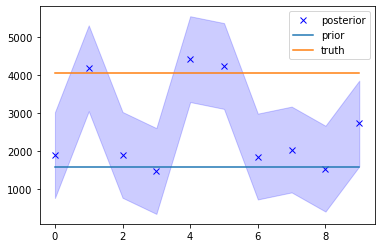

In [ ]:
mean = posterior.mean("source_group")
std = np.tile(posterior.mean("source_group").std("time_state"), len(mean))
line = plt.plot(mean, "bx", label="posterior")[0]
plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2, color=line._color)

plt.plot(basic_setup.emissions.prior_absolute.mean("source_group"), label="prior")
plt.plot(basic_setup.emissions.truth_absolute.mean("source_group"), label="truth")
plt.legend()

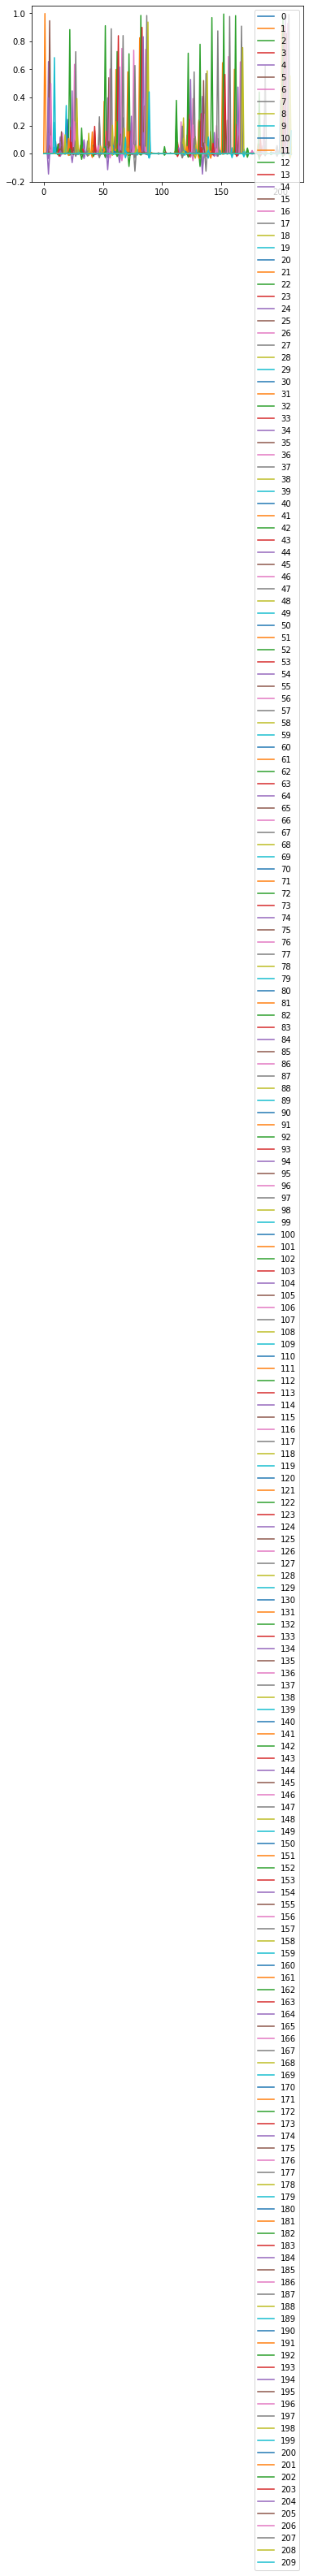

In [ ]:
averaging_kernel = basic_setup.reg.get_averaging_kernel()
for i in range(averaging_kernel.shape[0]):
    kernel = averaging_kernel[i]
    plt.plot(kernel, label=i)
plt.legend()


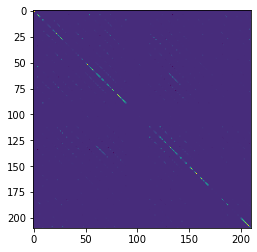

In [ ]:
plt.imshow(basic_setup.reg.get_averaging_kernel())

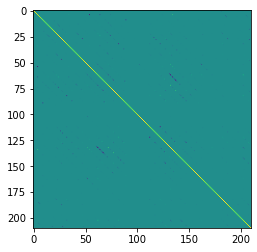

In [ ]:
plt.imshow(basic_setup.reg.get_correlation())

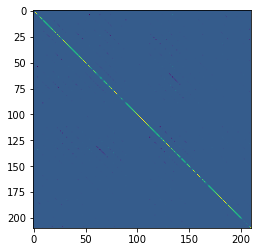

In [ ]:
plt.imshow(basic_setup.reg.get_posterior_covariance())

In [ ]:
basic_setup.reg.get_information_content(), basic_setup.reg.get_dof_signal(), basic_setup.reg.get_dof_noise()

(72.35861331720245, 56.10726678248306, 153.89273321751693)